# Project Title :-
## India’s Digital Payments Trend Analysis

# Introduction

This project analyzes India’s digital payment trends using daily transaction data collected from the India Data Portal, sourced from the Reserve Bank of India (RBI). The dataset covers the period from 2020 to 2024 and includes various modes of digital payments such as UPI, NEFT, RTGS, IMPS, AePS, BBPS, and card transactions. By performing data cleaning, preprocessing, and analysis, the project aims to uncover patterns, growth trends, and insights into India’s evolving digital payment ecosystem.

# Objectives

•	To analyse daily digital payment trends in India from 2020 to 2024 using RBI data.
•	To clean and preprocess the dataset by handling missing values, correcting data types, and removing duplicates.
•	To explore transaction volumes and values across different payment modes such as UPI, NEFT, RTGS, IMPS, AePS, and cards.
•	To create derived metrics like total transaction volume, total transaction value, and average transaction value per day.
•	To identify growth patterns, usage behaviour, and seasonal trends in India’s digital payment ecosystem.
•	To visualize key insights through charts and dashboards for better understanding and decision-making.



| Short Form | Full Form |
|-----------|-----------|
| RTGS | Real-Time Gross Settlement |
| NEFT | National Electronic Funds Transfer |
| AePS | Aadhaar Enabled Payment System |
| UPI | Unified Payments Interface |
| IMPS | Immediate Payment Service |
| NACH | National Automated Clearing House |
| NETC | National Electronic Toll Collection |
| BBPS | Bharat Bill Payment System |
| CTS | Cheque Truncation System |
| NFS | National Financial Switch |
| BCs | Business Correspondents |
| PPIs | Prepaid Payment Instruments |


# 1 Data Loading and Initial Overview 

# 1.1 Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In this step, we import the essential Python libraries that will be used throughout the analysis

# 1.2 Load Dataset

In [14]:
DATA_PATH = "RBI Digital Payments.csv"
df = pd.read_csv(DATA_PATH)


print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully!
Shape: (1706, 50)


,Unnamed: 0,date,rtgs_vol,rtgs_val,neft_vol,neft_val,aeps_vol,aeps_val,upi_vol,upi_val,...,credit_card_at_e_commerce_vol,credit_card_at_e_commerce_val,debit_card_at_pos_vol,debit_card_at_pos_val,debit_card_at_e_commerce_vol,debit_card_at_e_commerce_val,ppis_card_at_pos_vol,ppis_card_at_pos_val,ppis_card_at_e_commerce_vol,ppis_card_at_e_commerce_val
0,0,01-06-2020,4.85,436996.69,172.11,104275.13,0.44,7.68,476.97,10413.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,02-06-2020,4.54,361878.87,100.07,65259.02,0.44,7.67,476.78,9951.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,03-06-2020,4.30,330632.89,100.36,62985.75,0.44,7.48,456.26,9622.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,04-06-2020,4.35,329072.45,94.66,63148.29,0.45,7.32,463.05,9639.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,05-06-2020,4.56,365468.95,111.26,68932.72,0.48,7.32,464.79,9539.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this step, we load the dataset into a pandas DataFrame for further analysis. The dataset is stored in a CSV file named "RBI Digital Payments.csv".

# 1.3 Data Overview

In [17]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1706 non-null   int64  
 1   date                                   1706 non-null   object 
 2   rtgs_vol                               1662 non-null   float64
 3   rtgs_val                               1662 non-null   float64
 4   neft_vol                               1706 non-null   float64
 5   neft_val                               1706 non-null   float64
 6   aeps_vol                               1706 non-null   float64
 7   aeps_val                               1706 non-null   float64
 8   upi_vol                                1706 non-null   float64
 9   upi_val                                1706 non-null   float64
 10  imps_vol                               1706 non-null   float64
 11  imps

,Unnamed: 0,date,rtgs_vol,rtgs_val,neft_vol,neft_val,aeps_vol,aeps_val,upi_vol,upi_val,...,credit_card_at_e_commerce_vol,credit_card_at_e_commerce_val,debit_card_at_pos_vol,debit_card_at_pos_val,debit_card_at_e_commerce_vol,debit_card_at_e_commerce_val,ppis_card_at_pos_vol,ppis_card_at_pos_val,ppis_card_at_e_commerce_vol,ppis_card_at_e_commerce_val
count,1706.000000,1706,1662.000000,1.662000e+03,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,...,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
unique,NaN,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,31-01-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,852.500000,NaN,6.693712,4.244832e+05,159.832298,93722.640387,0.579812,16.949971,2534.319408,39532.997989,...,36.718302,2412.577137,44.371313,997.789467,21.931386,503.284315,1.905816,27.560722,2.868532,65.999467
std,492.624096,NaN,3.450098,2.866509e+05,86.456235,55898.712237,0.208948,6.082552,1544.973019,21570.239669,...,12.176996,1060.856869,15.415501,287.904139,10.773602,165.738797,1.188726,15.036837,2.598883,33.723551
min,0.000000,NaN,0.000000,1.200000e-01,6.060000,2093.330000,0.160000,4.310000,289.000000,4333.740000,...,11.040000,426.000000,18.550000,448.220000,6.500000,205.570000,0.480000,7.640000,0.520000,7.670000
25%,426.250000,NaN,4.690000,1.450407e+05,101.142500,54258.775000,0.430000,13.115000,1105.417500,19857.672500,...,29.100000,1662.490000,31.505000,792.295000,13.110000,384.020000,0.970000,17.290000,1.120000,43.775000
50%,852.500000,NaN,7.580000,4.712746e+05,150.425000,100410.525000,0.570000,16.880000,2280.215000,37306.855000,...,35.530000,2275.610000,42.620000,950.050000,19.400000,490.740000,1.460000,20.740000,1.550000,59.320000
75%,1278.750000,NaN,9.180000,6.287014e+05,214.232500,128357.650000,0.700000,20.377500,3828.060000,56383.285000,...,42.080000,3005.865000,54.585000,1121.195000,28.660000,598.105000,2.510000,34.890000,3.875000,79.415000


After loading the dataset, it is important to understand its structure, data types, and basic statistical properties. This step helps identify potential data quality issues such as missing values, incorrect formats, or outliers.

# 2  Data Pre-processing 

# 2.1 Data Cleaning

In [19]:
# Rename columns
df.rename(columns={
    'date': 'DATE',
    'rtgs_vol': 'RTGS Volume',
    'rtgs_val': 'RTGS Value',
    'neft_vol': 'NEFT Volume',
    'neft_val': 'NEFT Value',
    'aeps_vol': 'AePS Volume',
    'aeps_val': 'AePS Value',
    'upi_vol': 'UPI Volume',
    'upi_val': 'UPI Value',
    'imps_vol': 'IMPS Volume',
    'imps_val': 'IMPS Value',
    'nach_credit_vol': 'NACH Credit Volume',
    'nach_credit_val': 'NACH Credit Value',
    'nach_debit_vol': 'NACH Debit Volume',
    'nach_debit_val': 'NACH Debit Value',
    'netc_vol': 'NETC Volume',
    'netc_val': 'NETC Value',
    'bbps_vol': 'BBPS Volume',
    'bbps_val': 'BBPS Value',
    'cts_vol': 'CTS Volume',
    'cts_val': 'CTS Value',
    'nfs_through_atms_vol': 'NFS (through ATMs) Volume',
    'nfs_through_atms_val': 'NFS (through ATMs) Value',
    'aeps_through_micro_atms_or_bcs_vol': 'AePS (through micro – ATMs / BCs) Volume',
    'aeps_through_micro_atms_or_bcs_val': 'AePS (through micro – ATMs / BCs) Value',
    'credit_card_at_pos_and_e_commerce_vol': 'Credit Card (At POS and e-Commerce) Volume',
    'credit_card_at_pos_and_e_commerce_val': 'Credit Card (At POS and e-Commerce) Value',
    'debit_card_at_pos_and_e_commerce_vol': 'Debit Card (At POS and e-Commerce) Volume',
    'debit_card_at_pos_and_e_commerce_val': 'Debit Card (At POS and e-Commerce) Value',
    'ppis_card_at_pos_and_e_commerce_vol': 'Prepaid Payment Instruments (PPIs) Card (At POS and e-Commerce) Volume',
    'ppis_card_at_pos_and_e_commerce_val': 'Prepaid Payment Instruments (PPIs) Card (At POS and e-Commerce) Value',
    'government_securities_clearing_vol': 'Government Securities Clearing Volume',
    'government_securities_clearing_val': 'Government Securities Clearing Value',
    'forex_clearing_vol': 'Forex Clearing Volume',
    'forex_clearing_val': 'Forex Clearing Value',
    'rupee_derivatives_vol': 'Rupee Derivatives (For all deals matched during the day) Volume',
    'rupee_derivatives_val': 'Rupee Derivatives (For all deals matched during the day) Value',
    'credit_card_at_pos_vol': 'Credit Card Volume',
    'credit_card_at_pos_val': 'Credit Card Value',
    'credit_card_at_e_commerce_vol': 'Credit Card Volume e-Commerce',
    'credit_card_at_e_commerce_val': 'Credit Card Value e-Commerce',
    'debit_card_at_pos_vol': 'Debit Card Volume',
    'debit_card_at_pos_val': 'Debit Card Value',
    'debit_card_at_e_commerce_vol': 'Debit Card Volume e-Commerce',
    'debit_card_at_e_commerce_val': 'Debit Card Value e-Commerce',
    'ppis_card_at_pos_vol': 'Prepaid Payment Instruments (PPIs) Card Volume',
    'ppis_card_at_pos_val': 'Prepaid Payment Instruments (PPIs) Card Value',
    'ppis_card_at_e_commerce_vol': 'Prepaid Payment Instruments (PPIs) Card Volume at e-Commerce',
    'ppis_card_at_e_commerce_val': 'Prepaid Payment Instruments (PPIs) Card Value at e-Commerce'
}, inplace=True)

In this step, column names are renamed to more clear and readable. This improves consistency, makes the dataset easier to interpret, and helps during analysis and visualization.

In [20]:
print("\n Valid Date Range:")
print("Min Date:", df['DATE'].min())
print("Max Date:", df['DATE'].max())


 Valid Date Range:
Min Date: 01-01-2021
Max Date: 31-12-2024


This step identifies the minimum and maximum dates in the dataset. It helps confirm the time period covered and ensures the date values are valid and consistent.

In [21]:
df.drop(df.columns[0], axis=1, inplace=True)

The first column in the dataset is removed because it is not useful for analysis . This keeps the dataset clean and focused.

In [22]:
print("\nUpdated Column Names:\n")
print(df.columns)


Updated Column Names:

Index(['DATE', 'RTGS Volume', 'RTGS Value', 'NEFT Volume', 'NEFT Value',
       'AePS Volume', 'AePS Value', 'UPI Volume', 'UPI Value', 'IMPS Volume',
       'IMPS Value', 'NACH Credit Volume', 'NACH Credit Value',
       'NACH Debit Volume', 'NACH Debit Value', 'NETC Volume', 'NETC Value',
       'BBPS Volume', 'BBPS Value', 'CTS Volume', 'CTS Value',
       'NFS (through ATMs) Volume', 'NFS (through ATMs) Value',
       'AePS (through micro – ATMs / BCs) Volume',
       'AePS (through micro – ATMs / BCs) Value',
       'Credit Card (At POS and e-Commerce) Volume',
       'Credit Card (At POS and e-Commerce) Value',
       'Debit Card (At POS and e-Commerce) Volume',
       'Debit Card (At POS and e-Commerce) Value',
       'Prepaid Payment Instruments (PPIs) Card (At POS and e-Commerce) Volume',
       'Prepaid Payment Instruments (PPIs) Card (At POS and e-Commerce) Value',
       'Government Securities Clearing Volume',
       'Government Securities Clearing 

This step prints the column names to confirm that they have been successfully renamed and updated as intended.

| Column Name | Meaning |
|------------|---------|
| DATE | Date of transaction record |
| RTGS Volume / Value | Number of RTGS transactions & their total value |
| NEFT Volume / Value | Number of NEFT transactions & their total value |
| AePS Volume / Value | Aadhaar-based digital transaction count & value |
| UPI Volume / Value | Total UPI payments count & value |
| IMPS Volume / Value | IMPS transactions count & value |
| NACH Credit Volume / Value | Automated credit transactions (salary, pension, subsidies etc.) |
| NACH Debit Volume / Value | Automated debit requests (bills, EMIs, subscriptions) |
| NETC Volume / Value | FASTag toll collection transaction count & value |
| BBPS Volume / Value | Utility/bill payments processed via BBPS |
| CTS Volume / Value | Cheque-based digital clearing volume/value |
| NFS (through ATMs) Volume/Value | ATM transactions routed via National Financial Switch |
| AePS (through micro–ATMs/BCs) Volume/Value | Aadhaar-based transactions at rural outlets/micro ATM devices |
| Credit/Debit Card at POS and e-Commerce Volume/Value | Card transactions made via physical swipe machines or online shopping |
| PPIs Card (POS/e-commerce) Volume/Value | Wallet-based prepaid card transactions online or at stores |
| Government Securities Clearing Volume/Value | Volume and value of settlement of government securities |
| Forex Clearing Volume/Value | Clearing transactions related to foreign exchange market |
| Rupee Derivatives Volume/Value | Clearing volume/value of INR-denominated derivative contracts |
| Credit Card Volume / Value | General credit card transactions at physical POS machines |
| Credit Card Volume e-Commerce / Value e-Commerce | Online shopping credit card transactions |
| Debit Card Volume / Value | POS-based debit card transactions |
| Debit Card Volume e-Commerce / Value e-Commerce | Online debit card transactions |
| PPIs Card Volume / Value | Physical swipe prepaid instrument transactions |
| PPIs Card Volume e-Commerce / Value e-Commerce | Online wallet card-based purchase transactions |


In [23]:
df.to_csv("RBI Digital Payments.csv", index=False)
print("\n✅ Cleaned dataset saved as 'RBI Digital Payments.csv")


✅ Cleaned dataset saved as 'RBI Digital Payments.csv


The cleaned and updated dataset is saved back to a CSV file without the index. This ensures the processed data is ready for analysis, visualization, or future use.

# 2.2 Remove duplicates

In [24]:
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)


This step checks for duplicate rows and removes them to ensure data accuracy and prevent repeated values from influencing the analysis. The number of rows before and after removal is compared to confirm the change.

In [25]:
print("\n Duplicate Rows Count:")
print(df.duplicated().sum())


 Duplicate Rows Count:
0


This step prints the number of duplicate rows still present in the dataset after cleaning, ensuring no repeated entries remain.

# 2.3 Correcting data types 

In [26]:
df['DATE'] = df['DATE'].astype(str).str.strip()
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y', errors='coerce', dayfirst=True)


The DATE column is cleaned and converted from text format to a proper datetime format. This ensures the dates are consistent and ready for time-series analysis and visualization.

In [27]:
for col in df.columns:
    if col != 'DATE':
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("\n✅ Data types corrected successfully.")

print("\nMissing Values Before Cleaning:\n", df.isnull().sum())        
        



✅ Data types corrected successfully.

Missing Values Before Cleaning:
 DATE                                                                         0
RTGS Volume                                                                 44
RTGS Value                                                                  44
NEFT Volume                                                                  0
NEFT Value                                                                   0
AePS Volume                                                                  0
AePS Value                                                                   0
UPI Volume                                                                   0
UPI Value                                                                    0
IMPS Volume                                                                  0
IMPS Value                                                                   0
NACH Credit Volume                                         

All columns except the DATE column are converted to numeric data types. This ensures that values stored as text or mixed types can be used correctly in calculations and visualizations. Any non-convertible values are set to NaN.        
        

# 2.4 Handle missing values

In [28]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(0)


All numeric columns are checked for missing values, and any NaN values are replaced with 0. This ensures the dataset remains complete and avoids errors during analysis and visualization.

In [29]:
print("\n Missing Values Count:")
print(df.isnull().sum())


 Missing Values Count:
DATE                                                                      0
RTGS Volume                                                               0
RTGS Value                                                                0
NEFT Volume                                                               0
NEFT Value                                                                0
AePS Volume                                                               0
AePS Value                                                                0
UPI Volume                                                                0
UPI Value                                                                 0
IMPS Volume                                                               0
IMPS Value                                                                0
NACH Credit Volume                                                        0
NACH Credit Value                                               

This step displays the number of missing values remaining in each column to confirm that the dataset has been successfully cleaned.

# 2.5 Creating derived columns

In [30]:
volume_cols = [col for col in df.columns if 'Volume' in col]
value_cols = [col for col in df.columns if 'Value' in col]

df['Total Transaction Volume'] = df[volume_cols].sum(axis=1)
df['Total Transaction Value'] = df[value_cols].sum(axis=1)

df['Average Transaction Value'] = 0
df.loc[df['Total Transaction Volume'] != 0, 'Average Transaction Value'] = (
    df['Total Transaction Value'] / df['Total Transaction Volume']
)

print(" Derived columns created successfully.")


 Derived columns created successfully.


New calculated columns are added to enhance analysis:
Total Transaction Volume: Sum of all volume-related columns.
Total Transaction Value: Sum of all value-related columns.
Average Transaction Value: Calculated as total value divided by total volume (where volume is not zero).
These derived metrics provide a clearer view of transaction trends and comparisons.

In [31]:
print("\n Valid Date Range:")
print("Min Date:", df['DATE'].min())
print("Max Date:", df['DATE'].max())


 Valid Date Range:
Min Date: 2020-06-01 00:00:00
Max Date: 2025-01-31 00:00:00


After cleaning and formatting, the minimum and maximum dates are printed again to confirm that the date values are correct and consistent.

In [32]:
df.to_csv("RBI Digital Payments.csv", index=False)
print("\n Final preprocessed dataset saved as 'RBI Digital Payments.csv'")


 Final preprocessed dataset saved as 'RBI Digital Payments.csv'


The fully cleaned and processed dataset is saved back to a CSV file without the index. This ensures the dataset is ready for analysis and visualization in the next steps.

# 3 Exploratory Data Analysis (EDA)

# 3.1 Univariate Analysis

In [33]:
print("\n Distribution of Total Transaction Volume:")
print(df['Total Transaction Volume'].describe())


 Distribution of Total Transaction Volume:
count    1706.000000
mean     3382.564877
std      1724.894433
min       520.830000
25%      1820.945000
50%      3177.185000
75%      4787.135000
max      8210.500000
Name: Total Transaction Volume, dtype: float64


This step prints the descriptive statistics for the Total Transaction Volume column, helping understand its spread, central tendency, and overall distribution before visualization.

In [34]:
print("\n Distribution of Total Transaction Value:")
print(df['Total Transaction Value'].describe())


 Distribution of Total Transaction Value:
count    1.706000e+03
mean     1.157884e+06
std      8.999986e+05
min      1.307654e+04
25%      2.403700e+05
50%      1.364127e+06
75%      1.872291e+06
max      4.788204e+06
Name: Total Transaction Value, dtype: float64


This step prints the descriptive statistics for the Total Transaction Value column, helping assess its range, mean, variation, and overall distribution before further analysis.

In [35]:
print("\n Distribution of UPI Volume:")
print(df['UPI Volume'].describe())


 Distribution of UPI Volume:
count    1706.000000
mean     2534.319408
std      1544.973019
min       289.000000
25%      1105.417500
50%      2280.215000
75%      3828.060000
max      6441.180000
Name: UPI Volume, dtype: float64


This step prints the descriptive statistics for the UPI Volume column, helping understand its growth pattern, range, central values, and variability within the dataset.

In [36]:
print("\n Distribution of RTGS Value:")
print(df['RTGS Value'].describe())


 Distribution of RTGS Value:
count    1.706000e+03
mean     4.135353e+05
std      2.908235e+05
min      0.000000e+00
25%      1.151397e+05
50%      4.660035e+05
75%      6.248019e+05
max      1.589480e+06
Name: RTGS Value, dtype: float64


This step prints descriptive statistics for the RTGS Value column to understand its range, average value, variation, and overall distribution before visualization or deeper analysis.

# 3.2 Groupby & Trend Analysis

In [39]:
df['Year'] = df['DATE'].dt.year
print("\n Average Transaction Value by Year:")
print(df.groupby('Year')['Average Transaction Value'].mean())


 Average Transaction Value by Year:
Year
2020    344.099477
2021    450.240739
2022    424.732370
2023    326.083501
2024    263.901828
2025    274.529981
Name: Average Transaction Value, dtype: float64


This step groups the data by year and calculates the mean of the Average Transaction Value for each year. It helps identify trends and changes in transaction value over time.

In [40]:
print("\n Total Digital Transaction Value by Year:")
print(df.groupby('Year')['Total Transaction Value'].sum())


 Total Digital Transaction Value by Year:
Year
2020    8.593301e+07
2021    3.109071e+08
2022    4.581029e+08
2023    5.011719e+08
2024    5.631823e+08
2025    5.605299e+07
Name: Total Transaction Value, dtype: float64


This step groups the dataset by year and calculates the sum of Total Transaction Value for each year. It helps determine how digital payment value has grown or changed over time.

In [42]:
df['Month'] = df['DATE'].dt.month
print("\n Total UPI Value by Month (Across All Years):")
print(df.groupby('Month')['UPI Value'].sum())


 Total UPI Value by Month (Across All Years):
Month
1     6751354.85
2     4315621.71
3     4848771.94
4     4857206.36
5     5063408.64
6     5306166.74
7     5557366.97
8     5647858.85
9     5743246.10
10    6434691.03
11    6244956.67
12    6672644.71
Name: UPI Value, dtype: float64


This step groups the data by month and calculates the total UPI transaction value across all years. It helps identify seasonal patterns or peak months for UPI usage.

# 3.3 Pivot Table Analysis

In [43]:
print("\n Monthly Trend of UPI Volume (Pivot Table):")
pivot_upi = df.pivot_table(values='UPI Volume', index='Year', columns='Month', aggfunc='sum')
print(pivot_upi)


 Monthly Trend of UPI Volume (Pivot Table):
Month         1          2          3          4          5          6   \
Year                                                                      
2020         NaN        NaN        NaN        NaN        NaN   13369.33   
2021    23027.28   22928.94   27316.85   26410.61   25291.82   28075.16   
2022    46171.56   45274.89   54056.51   55843.88   59462.89   58629.08   
2023    80385.88   75347.57   86516.34   88632.60   94151.85   93350.64   
2024   122030.18  121026.73  134400.04  133039.94  140358.43  138851.42   
2025   169960.01        NaN        NaN        NaN        NaN        NaN   

Month         7          8          9          10         11         12  
Year                                                                     
2020    14973.54   16188.27   18001.67   20716.19   22102.29   22341.58  
2021    32455.02   35555.45   36558.17   42184.32   41864.80   45662.99  
2022    62893.40   65819.06   67807.99   73054.21   73094.

A pivot table is created to show UPI transaction volume across months for each year. This helps compare usage patterns over time and identify seasonal or yearly trends.

In [44]:
print("\n Comparison of RTGS vs NEFT Volume by Year:")
pivot_compare = df.pivot_table(values=['RTGS Volume', 'NEFT Volume'], index='Year', aggfunc='sum')
print(pivot_compare)


 Comparison of RTGS vs NEFT Volume by Year:
      NEFT Volume  RTGS Volume
Year                          
2020     18061.32       930.81
2021     38008.83      2003.50
2022     49480.22      2364.49
2023     65871.24      2605.11
2024     92684.34      2952.87
2025      8567.95       268.17


A pivot table is generated to compare the total yearly transaction volume of RTGS and NEFT. This helps analyze how usage of these two major payment systems has changed over time.

# 3.4 7️ Correlation Analysis

In [45]:
print("\n Correlation Matrix (Numeric Columns Only):")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


 Correlation Matrix (Numeric Columns Only):
                                                    RTGS Volume  RTGS Value  \
RTGS Volume                                            1.000000    0.919069   
RTGS Value                                             0.919069    1.000000   
NEFT Volume                                            0.775277    0.746151   
NEFT Value                                             0.922983    0.939498   
AePS Volume                                            0.162312    0.163796   
AePS Value                                             0.303479    0.259331   
UPI Volume                                             0.346066    0.300000   
UPI Value                                              0.496635    0.439550   
IMPS Volume                                            0.515629    0.424855   
IMPS Value                                             0.742178    0.674504   
NACH Credit Volume                                     0.383436    0.354299   
NACH Cr

This step computes the correlation matrix for all numeric columns to identify relationships between different digital payment metrics. It helps detect strong positive or negative correlations useful for further analysis and visualization.

In [46]:
print("\n Top Correlations With Total Transaction Value:")
print(corr_matrix['Total Transaction Value'].sort_values(ascending=False))



 Top Correlations With Total Transaction Value:
Total Transaction Value                                                   1.000000
RTGS Value                                                                0.936578
Government Securities Clearing Value                                      0.925088
Forex Clearing Volume                                                     0.899365
Government Securities Clearing Volume                                     0.894088
NEFT Value                                                                0.883517
RTGS Volume                                                               0.859830
Forex Clearing Value                                                      0.831022
NEFT Volume                                                               0.760779
IMPS Value                                                                0.740505
CTS Value                                                                 0.739849
Average Transaction Value             

This step lists the correlation values of all variables against Total Transaction Value, sorted from highest to lowest. It helps identify which payment modes contribute the most to overall transaction value.

# 4. VISUALIZATIONS

# 4.1 Total Digital Transaction Volume over time

# Line Chart

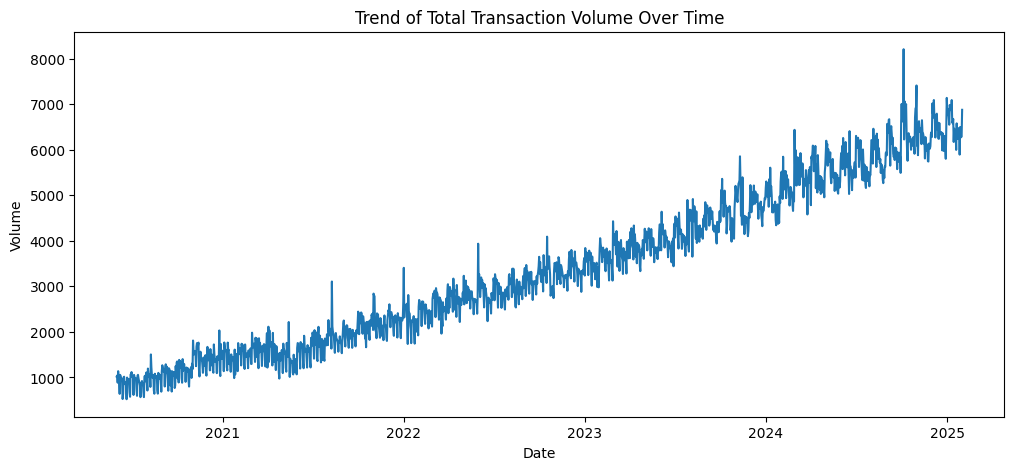

In [47]:
plt.figure(figsize=(12,5))
plt.plot(df['DATE'], df['Total Transaction Volume'])
plt.title("Trend of Total Transaction Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()



This visualization helps to identify how digital transaction usage has evolved over time. It clearly highlights growth patterns, fluctuations, seasonality, or major increases due to policy, festival periods, or market adoption.

# 4.2  Average Transaction Volume (UPI vs NEFT vs RTGS)

# Bar Chart

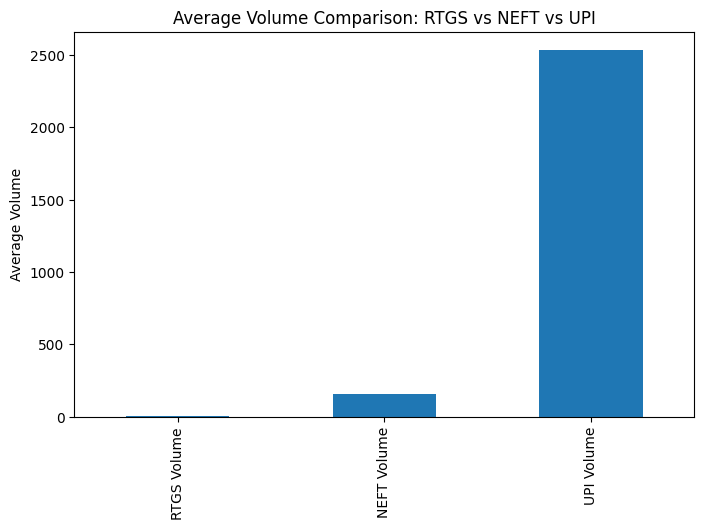

In [48]:
compare = df[['RTGS Volume', 'NEFT Volume', 'UPI Volume']].mean()

plt.figure(figsize=(8,5))
compare.plot(kind='bar')
plt.title("Average Volume Comparison: RTGS vs NEFT vs UPI")
plt.ylabel("Average Volume")
plt.show()


This visualization compares the scale of usage across major payment systems. It shows which system is used most frequently.
UPI typically has the highest usage due to instant transfers and low transaction cost.
RTGS is used less frequently but for large-value transactions.
NEFT remains widely used for banking transactions.

# 4.3 RTGS vs NEFT Transaction Value Distribution


# Box Plot

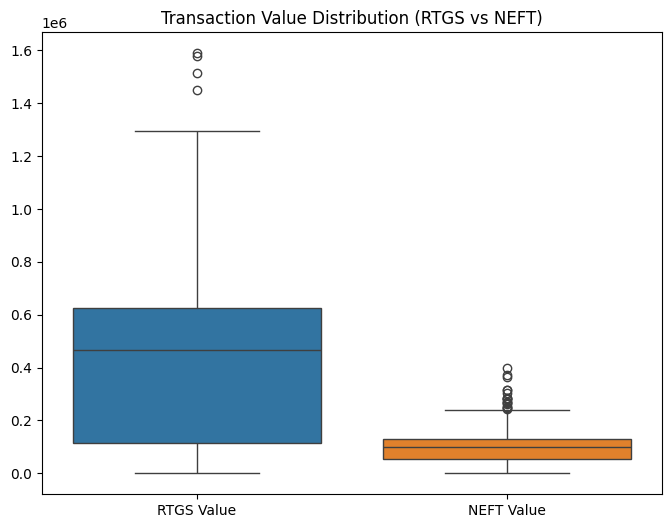

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['RTGS Value', 'NEFT Value']])
plt.title("Transaction Value Distribution (RTGS vs NEFT)")
plt.show()


This visualization shows the spread, median, and outliers in transaction values.
RTGS may show large variability and high-value spikes.
NEFT values are more stable with fewer extreme outliers.

# 4.4 UPI Value Distribution

# Histogram

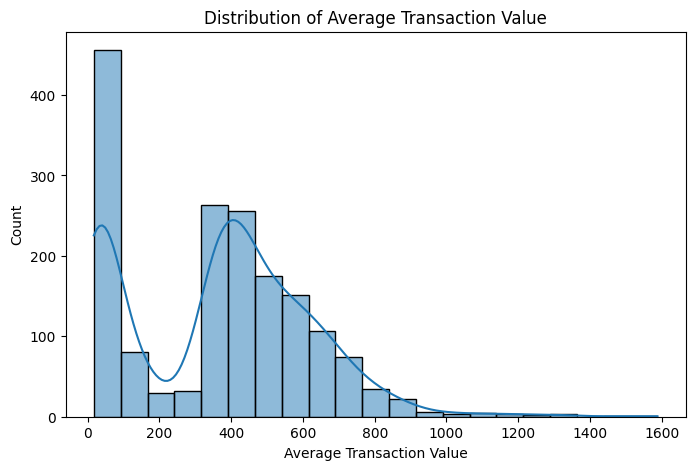

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['Average Transaction Value'], kde=True)
plt.title("Distribution of Average Transaction Value")
plt.show()


The histogram reveals how UPI transaction values are distributed — whether they are mostly small or high-value transactions.
Most UPI payments occur at low to medium transaction values.
A long tail indicates occasional high-value usage.

# 4.5 Correlation Between Major Payment Modes

# Heatmap

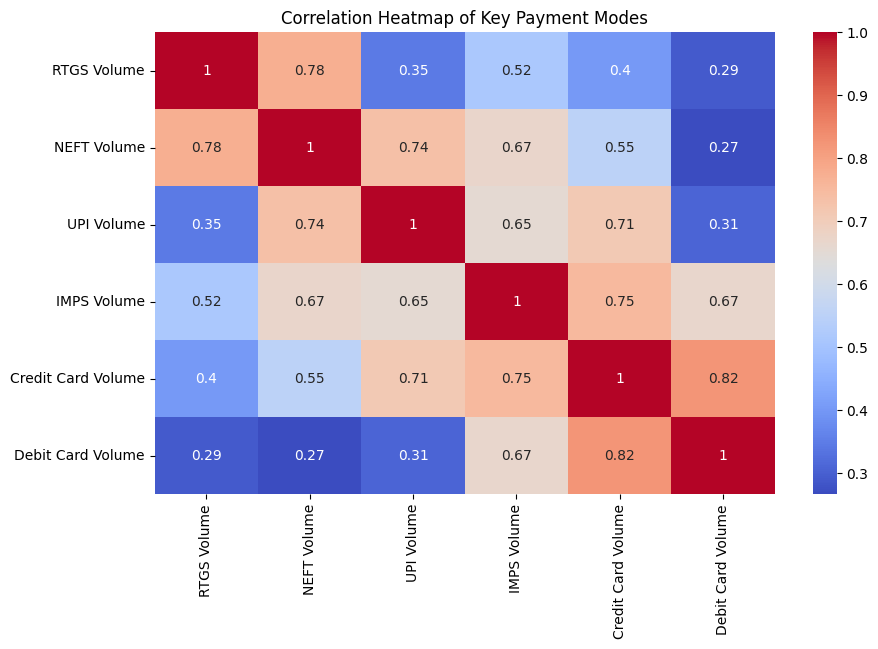

In [53]:
subset = df[['RTGS Volume','NEFT Volume','UPI Volume','IMPS Volume','Credit Card Volume','Debit Card Volume']]
plt.figure(figsize=(10,6))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Payment Modes")
plt.show()


This chart measures how strongly two payment modes move together.
High correlation implies similar adoption behavior.

# 4.6 UPI Value vs IMPS Value

# Scatter Plot

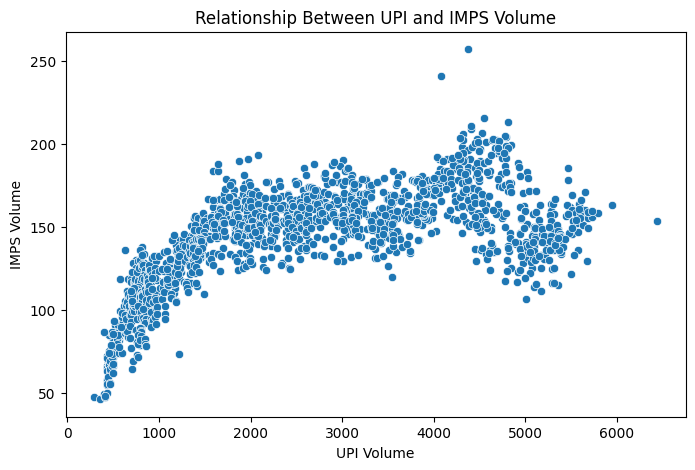

In [55]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['UPI Volume'], y=df['IMPS Volume'])
plt.title("Relationship Between UPI and IMPS Volume")
plt.xlabel("UPI Volume")
plt.ylabel("IMPS Volume")
plt.show()


This visual evaluates whether there is a linear relationship between instant digital payment systems.
A positive upward pattern suggests both systems grow together.
Random spread indicates independent usage behavior.

# 4.7 Market Share of Payment Channels

# Pie Chart

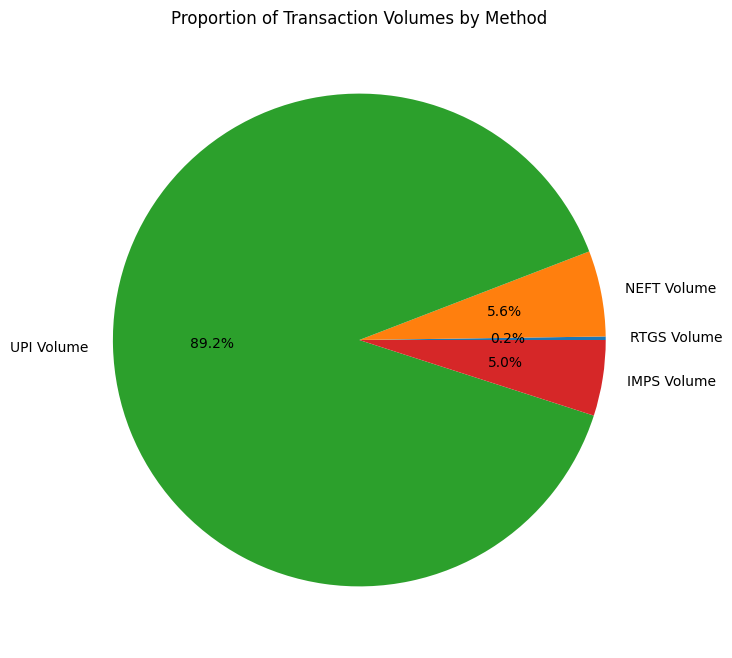

In [56]:
volumes = df[['RTGS Volume','NEFT Volume','UPI Volume','IMPS Volume']].sum()

plt.figure(figsize=(8,8))
plt.pie(volumes, labels=volumes.index, autopct="%1.1f%%")
plt.title("Proportion of Transaction Volumes by Method")
plt.show()


This visualization shows the relative contribution of payment methods to the overall ecosystem.
Helps identify the dominant platform (e.g., UPI).
Minority methods (like NETC or BBPS) can be tracked for growth potential.

# 4.8 Growth of UPI Volume Over Time

# Area Chart

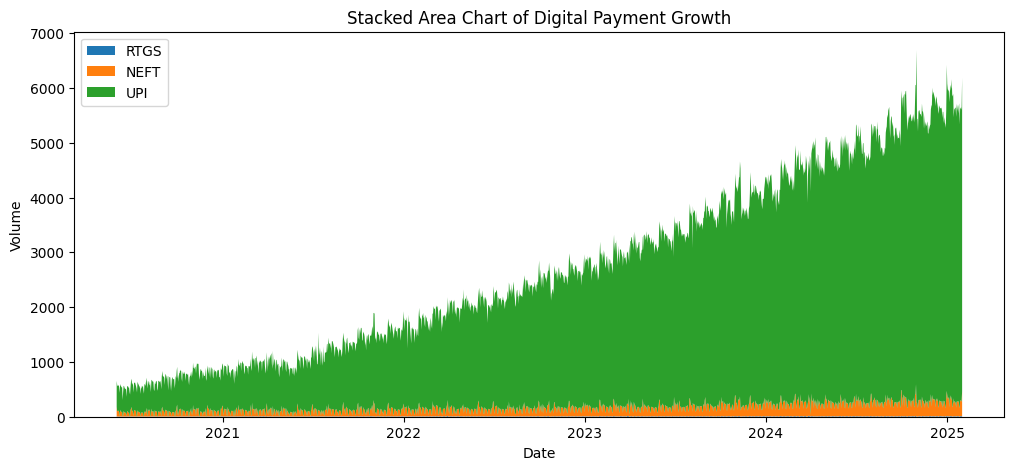

In [57]:
plt.figure(figsize=(12,5))
plt.stackplot(df['DATE'], df['RTGS Volume'], df['NEFT Volume'], df['UPI Volume'], labels=['RTGS','NEFT','UPI'])
plt.legend(loc='upper left')
plt.title("Stacked Area Chart of Digital Payment Growth")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


An area plot emphasizes cumulative growth and adoption trend rather than point-by-point fluctuations.
Shows how UPI is expanding over time.
Useful to illustrate trends in a visually strong and clear way.

# 4.9 Relationship Between Multiple Payment Systems

# Pairplot

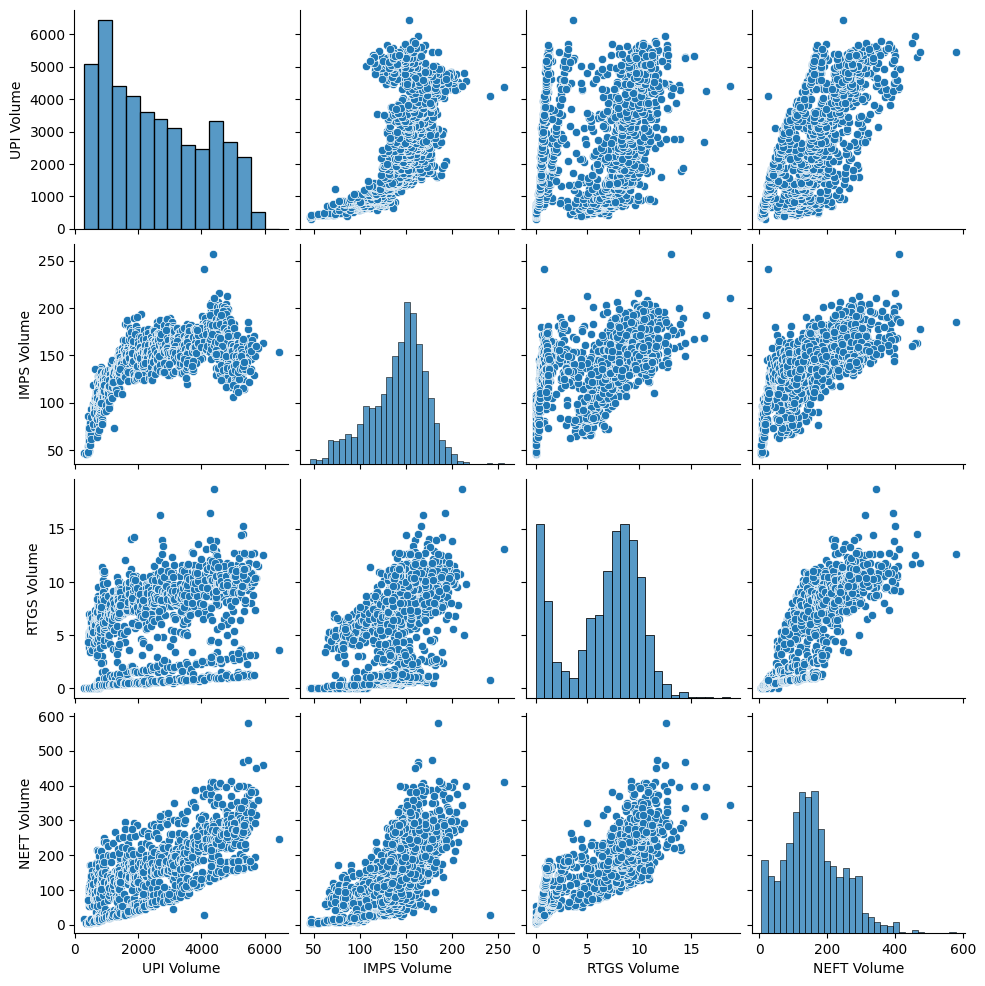

In [58]:
sns.pairplot(df[['UPI Volume','IMPS Volume','RTGS Volume','NEFT Volume']])
plt.show()


This multivariate visualization compares relationships between more than two payment metrics at once.
Identifies clusters, similarities, and relationships.
Helps determine if payment methods compete or complement each other.

# 4.10 UPI Volume (7-Day Smooth Trend)

# Average Line Chart

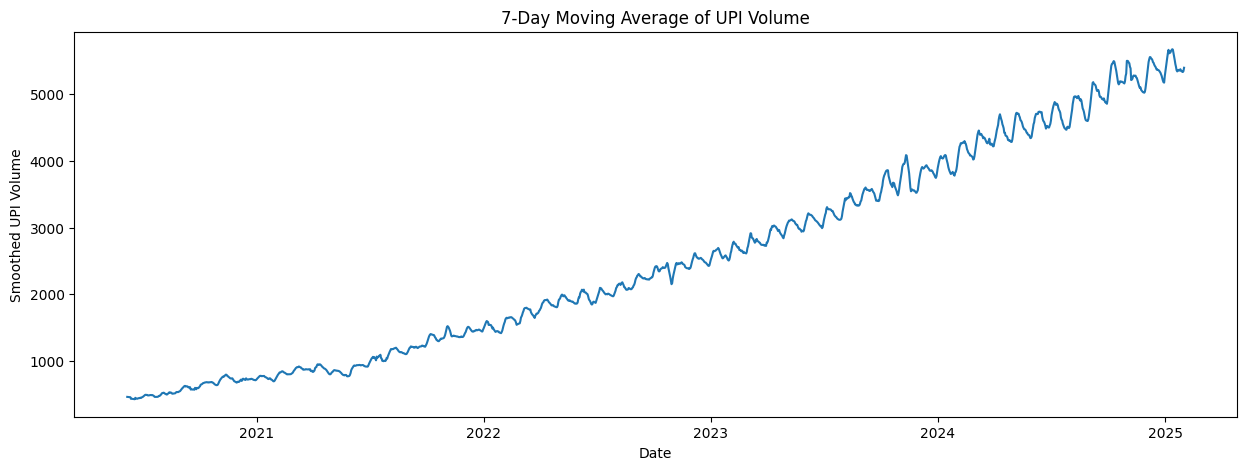

In [59]:
df['UPI_7D_Avg'] = df['UPI Volume'].rolling(7).mean()

plt.figure(figsize=(15,5))
plt.plot(df['DATE'], df['UPI_7D_Avg'])
plt.title("7-Day Moving Average of UPI Volume")
plt.xlabel("Date")
plt.ylabel("Smoothed UPI Volume")
plt.show()


Smoothing removes noisy day-to-day fluctuations and highlights the true underlying trend. 
Helps detect acceleration or slowdown trends.
Useful for forecasting future demand.

# 4.11 Smooth Density Curve

# KDE Plot

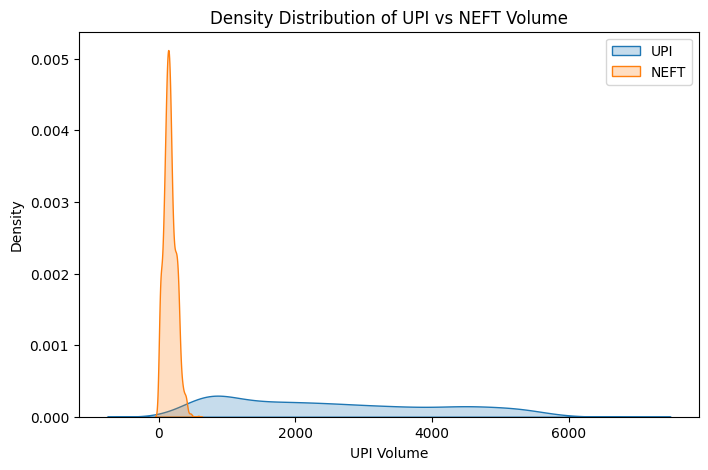

In [60]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['UPI Volume'], label='UPI', shade=True)
sns.kdeplot(df['NEFT Volume'], label='NEFT', shade=True)
plt.title("Density Distribution of UPI vs NEFT Volume")
plt.legend()
plt.show()


This KDE (Kernel Density Estimation) plot is used to compare the distribution patterns of transaction volumes for UPI and NEFT.
The UPI curve shows how UPI transaction volume is spread, helping understand whether it is concentrated in a specific range or widely distributed.

# 5 Insight Generation & Final Report

# 5.1 Overview of Analysis

The dataset represents India's digital payment activity between 2020 and 2024, containing daily transaction records across several payment systems including UPI, NEFT, IMPS, RTGS, cards, BBPS, NETC, and AePS. After preprocessing and analysis, multiple trends, correlations, and usage patterns were identified.

# 5.2 Key Insights

1  Digital Payments Show a Clear Upward Growth Trend

Total transaction volume and total transaction value steadily increased year-by-year.
The highest growth was observed from 2021 onward, likely driven by adoption of mobile payments and cashless initiatives.

2  UPI is the Dominant Digital Payment Method

UPI accounts for the majority share of total transaction volume.
Yearly aggregates show exponential growth in both volume and value.
Correlation analysis shows a strong positive relationship between:

UPI Volume and Total Transaction Volume
UPI Value and Total Transaction Value

3️  High-Value Transfers Depend More on RTGS & NEFT

RTGS has lower volume but significantly higher transaction value, indicating usage primarily for high-value transfers.
NEFT shows moderate volume and value, acting as a bridge between traditional banking and digital instant systems.

4️  Wallets and Cards Show Steady but Slower Growth

Debit and credit card transaction volumes increased, but not as sharply as UPI.
Prepaid payment instruments (PPI wallets) showed the slowest adoption, likely due to UPI replacing wallet-based payments.

5️  Seasonal Spikes Detected

UPI, IMPS, and card usage spikes around:
Festive periods (October–December)
Financial year-end (March)
These may be linked to shopping festivals, salary cycles, and business settlements.

6️  Outlier & Anomaly Detection

Rare but noticeable spikes in RTGS and NEFT values may represent:
Government settlements
Corporate payroll cycles
Financial sector adjustments
UPI volume shows fewer extreme outliers due to more consistent usage patterns.

7️  Transaction Efficiency (Average Transaction Value)

Average Transaction Value (ATV) decreases over time.
Interpretation: As digital payments become more widespread, users conduct smaller, more frequent transactions—a sign of digital maturity.

# 5.3 Conclusions

India’s digital payment ecosystem has shown strong and consistent growth over the observed period.

UPI is the leading technology, outperforming all other payment systems in both adoption and usage frequency.

Traditional systems like RTGS and NEFT remain relevant for large-value payments, especially corporate and institutional transactions.

Card-based payments retain usage but have been overtaken by UPI as the everyday transaction method.

The decreasing average transaction value indicates adoption across rural and micro-economy sectors.